In [1]:
# Notes from guest lecture
# preprocess all images
# augmentation training images only

In [2]:
from keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras import backend as K
from keras import regularizers

import numpy as np
from keras.preprocessing import image
import tensorflow.keras.metrics


import matplotlib.pyplot as plt

import pandas as pd
import os
import shutil
import sys

Using TensorFlow backend.


In [3]:
# Variables to feed down into modeling
image_width,img_height = 81,81

train_data_dir = 'edible_classifier_images/train'
test_data_dir = 'edible_classifier_images/test'

nb_train_samples = 200
nb_test_samples = 20
reg_num = 0.0001

epochs = 30
batch_size = 36 # Use powers of 2

In [4]:
# tell Keras to find the proper placement of the RBG data in each image
if K.image_data_format() =='channels_first':
    input_shape = (3,image_width,img_height)
else:
    input_shape = (image_width,img_height,3)

In [5]:
train_datagen = ImageDataGenerator(
                            rescale= (1.0 /255),
                            shear_range =0.2,
                            zoom_range =0.2,
                            horizontal_flip = True,
                            vertical_flip= True
                                    )

In [6]:
test_datagen = ImageDataGenerator( rescale= 1.0/255)

In [7]:
train_generator = train_datagen.flow_from_directory(
                                                    train_data_dir,
                                                    target_size=(image_width,img_height),
                                                    batch_size=batch_size,
                                                    class_mode = 'binary'
                                                    )

Found 475 images belonging to 2 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
                                                test_data_dir,
                                                target_size=(image_width,img_height),
                                                batch_size=batch_size,
                                                class_mode='binary'
                                                    )

Found 152 images belonging to 2 classes.


In [9]:
model = Sequential()

In [10]:
# First layer - input image
model.add(Conv2D(256,
                 kernel_size= (2,2), 
                 input_shape=input_shape, 
                 activation='relu',
                ))
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
# 2nd layer
model.add(Conv2D(81,
                 kernel_size=(2,2),
                 activation='relu',
                ))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [12]:
#3rd Layer
model.add(Conv2D(81,
                 kernel_size=(2,2),
                 activation='relu',
                ))

model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
# flatten
model.add(Flatten(input_shape=input_shape))

In [14]:
# 1st Dense
model.add(Dense(32, 
                activation='relu',
               ))

In [15]:
# 2nd Dense
model.add(Dense(32, 
                activation='relu',
               ))


In [16]:
# final output layer
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
model.compile( 
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
                )

In [18]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch= nb_train_samples // batch_size,
            epochs=epochs,
            validation_data=test_generator,
            validation_steps=nb_test_samples // batch_size,

)

model.save('history/edible_try.h5')

Epoch 1/30
5/5 [==============================] - 15s 3s/step - loss: 0.7010 - acc: 0.4722 - val_loss: 0.6699 - val_acc: 0.5724
Epoch 2/30
5/5 [==============================] - 12s 2s/step - loss: 0.6972 - acc: 0.5166 - val_loss: 0.6832 - val_acc: 0.5724
Epoch 3/30
5/5 [==============================] - 12s 2s/step - loss: 0.6796 - acc: 0.6000 - val_loss: 0.6746 - val_acc: 0.5724
Epoch 4/30
5/5 [==============================] - 11s 2s/step - loss: 0.6800 - acc: 0.5833 - val_loss: 0.6965 - val_acc: 0.5724
Epoch 5/30
5/5 [==============================] - 9s 2s/step - loss: 0.7125 - acc: 0.5232 - val_loss: 0.6853 - val_acc: 0.5724
Epoch 6/30
5/5 [==============================] - 11s 2s/step - loss: 0.6879 - acc: 0.5778 - val_loss: 0.6978 - val_acc: 0.5724
Epoch 7/30
5/5 [==============================] - 10s 2s/step - loss: 0.6887 - acc: 0.5629 - val_loss: 0.6590 - val_acc: 0.5724
Epoch 8/30
5/5 [==============================] - 11s 2s/step - loss: 0.6902 - acc: 0.5278 - val_loss: 0.

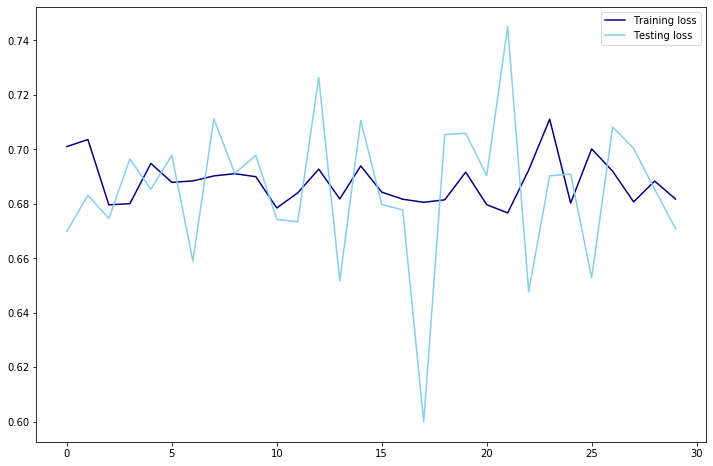

In [19]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend()
plt.savefig('figures/edibile_loss.png');

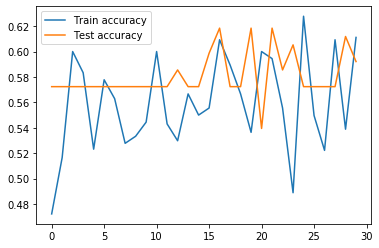

In [20]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend()
plt.savefig('figures/edibile_acc.png');

# Test single image

In [183]:
# img_pred = image.load_img('edible_classifier_images/test/agaricusarvensis/Agaricusarvensis2.JPG',target_size=(img_height,image_width))
# img_pred = image.img_to_array(img_pred)
# img_pred = np.expand_dims(img_pred, axis = 0)

In [184]:
# result = model.predict_classes(img_pred)

In [185]:
# print(result)

In [186]:
# if result[0][0] == 1:
#     prediction = 'inedible'
# else:
#     prediction = 'edible'
    
# print(prediction)

# Predict classes on testing - Inedible -data

In [187]:
#Create list for each image to be predicted on
ined_folder_list = sorted(os.listdir('edible_classifier_images/test/inedible'))
ined_folder_list[:5]

['albatrellusconfluens2.jpg',
 'amanitaceciliae2.jpg',
 'amanitafulva2.jpg',
 'amanitamuscaria2.jpg',
 'amanitapantherina2.jpg']

In [188]:
# Remove system/hidden files from the list so predictions aren't made on them
try:
    folder_list.remove('.DS_Store')
    folder_list.remove('.ipynb_checkpoints')
except:
    print('item not removed from folder list')

file didnt exist


In [189]:
ined_folder_list[:5]

['albatrellusconfluens2.jpg',
 'amanitaceciliae2.jpg',
 'amanitafulva2.jpg',
 'amanitamuscaria2.jpg',
 'amanitapantherina2.jpg']

In [190]:
# Generate Predictions on each test image in the inedible folder
ined_preds = []
counter=0
for i in ined_folder_list[:]:
     # Read each image from the testing - bad morels folder and generate/save predictions   
    try:
        img_path =(f'edible_classifier_images/test/inedible/{i}')

        img_pred = image.load_img(img_path,target_size=(img_height,image_width))
        img_pred = image.img_to_array(img_pred)
        img_pred = np.expand_dims(img_pred, axis = 0)
        result = model.predict_classes(img_pred)
        
        ined_preds.append(result)
        
        counter += 1
    # if there is an error assign a 3 to the error in the list so we can find it in EDA steps    
    except:
        print(f'error on {counter}')
        ined_preds.append(3)

In [191]:
ined_preds[:10]

[array([[0]], dtype=int32),
 array([[0]], dtype=int32),
 array([[0]], dtype=int32),
 array([[1]], dtype=int32),
 array([[1]], dtype=int32),
 array([[0]], dtype=int32),
 array([[0]], dtype=int32),
 array([[0]], dtype=int32),
 array([[1]], dtype=int32),
 array([[1]], dtype=int32)]

In [192]:
# Filter out 0 and 1 predictions from the results
ined_predictions=[]
for i in ined_preds:
    ined_predictions.append(int(i))
    

In [194]:
ined_predictions_df = pd.DataFrame(ined_predictions, columns =["predictions"])
ined_predictions_df.head()

In [196]:
ined_file_name = pd.DataFrame(ined_folder_list, columns=['file_name'])

In [197]:
# test to find if any results are 'unclassified'
ined_predictions_df.loc[ined_predictions_df['predictions']==3]

,predictions


In [198]:
ined_predictions_df = pd.concat([ined_file_name,ined_predictions_df],axis=1)

In [199]:
ined_predictions_df['actual_edible_type'] = 1
ined_predictions_df['edible_type'] = 'inedible'

In [200]:
ined_predictions_df.head()

,file_name,predictions,actual_edible_type,edible_type
0,albatrellusconfluens2.jpg,0,1,inedible
1,amanitaceciliae2.jpg,0,1,inedible
2,amanitafulva2.jpg,0,1,inedible
3,amanitamuscaria2.jpg,1,1,inedible
4,amanitapantherina2.jpg,1,1,inedible


# Predict classes on testing - Inedible -data

In [202]:
#Create list for each image to be predicted on
ed_folder_list = sorted(os.listdir('edible_classifier_images/test/edible'))
ed_folder_list[:5], len(ed_folder_list)

(['agaricusarvensis2.jpg',
  'agaricusaugustus2.jpg',
  'albatrellusovinus2.jpg',
  'armillariamellea2.jpg',
  'boletusbadius2.jpg'],
 65)

In [203]:
# Remove system/hidden files from the list so predictions aren't made on them
try:
    folder_list.remove('.DS_Store')
    folder_list.remove('.ipynb_checkpoints')
except:
    print('item not removed from folder list')

file didnt exist


In [204]:
ed_folder_list[:5]

['agaricusarvensis2.jpg',
 'agaricusaugustus2.jpg',
 'albatrellusovinus2.jpg',
 'armillariamellea2.jpg',
 'boletusbadius2.jpg']

In [205]:
# Generate Predictions on each test image in the edible folder
ed_preds = []
counter=0
for i in ed_folder_list[:]:
     # Read each image from the testing - bad morels folder and generate/save predictions   
    try:
        img_path =(f'edible_classifier_images/test/edible/{i}')

        img_pred = image.load_img(img_path,target_size=(img_height,image_width))
        img_pred = image.img_to_array(img_pred)
        img_pred = np.expand_dims(img_pred, axis = 0)
        result = model.predict_classes(img_pred)
        
        ed_preds.append(result)
        
        counter += 1
    # if there is an error assign a 3 to the error in the list so we can find it in EDA steps    
    except:
        print(f'error on {counter}')
        ed_preds.append(3)

In [206]:
ed_preds[:10]

[array([[0]], dtype=int32),
 array([[0]], dtype=int32),
 array([[0]], dtype=int32),
 array([[0]], dtype=int32),
 array([[0]], dtype=int32),
 array([[0]], dtype=int32),
 array([[0]], dtype=int32),
 array([[0]], dtype=int32),
 array([[0]], dtype=int32),
 array([[0]], dtype=int32)]

In [207]:
# Filter out 0 and 1 predictions from the results
ed_predictions=[]
for i in ed_preds:
    ed_predictions.append(int(i))
    

In [209]:
ed_predictions_df = pd.DataFrame(ed_predictions, columns =["predictions"])
ed_predictions_df.head()

In [212]:
ed_file_name = pd.DataFrame(ed_folder_list, columns=['file_name'])

In [213]:
# test to find if any results are 'unclassified'
ed_predictions_df.loc[ed_predictions_df['predictions']==3]

,predictions


In [214]:
ed_predictions_df = pd.concat([ed_file_name,ed_predictions_df],axis=1)

In [215]:
ed_predictions_df['actual_edible_type'] = 0
ed_predictions_df['edible_type'] = 'edible'

In [216]:
ed_predictions_df.head()

,file_name,predictions,actual_edible_type
0,agaricusarvensis2.jpg,0,0
1,agaricusaugustus2.jpg,0,0
2,albatrellusovinus2.jpg,0,0
3,armillariamellea2.jpg,0,0
4,boletusbadius2.jpg,0,0


In [217]:
ed_predictions_df.shape

(65, 3)

# Merge DFs

In [218]:
final_df = pd.concat([ed_predictions_df,ined_predictions_df])

In [219]:
final_df['actual_edible_type'].value_counts()

1    87
0    65
Name: actual_edible_type, dtype: int64

In [220]:
final_df['predictions'].value_counts()

1    79
0    73
Name: predictions, dtype: int64

In [221]:
final_df.to_csv('CSVs/pred_edibile_or_not.csv', index=False)